# Amazon Web Scraping

## Objetivos:
1. Realizar la extracción de información de una artículo a la venta en Amazon, como: Artículo, descripción, precio, puntuación y las opiniones destacadas.
2. Ejecutar un análisis de sentimientos a las opiniones destacadas del artículo, indicando la polaridad de las opiniones y generando una nube de términos. 


In [1]:
# Importar las librerías necesarias
 # Librería para realizar Web Scraping
import requests # Librería para hacer peticiones HTTP
import smtplib # Librería para automatizar envío de correos electrónicos
import time # Módulo para la ejecución de tareas relacionadas con tiempo
import datetime # Módulo para el trabajo con fechas y horas
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
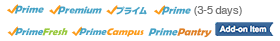

In [2]:
# Conectar al sitio Web desde el que se va a extaer los datos
URL='https://www.amazon.com/-/es/G-Shock-digital-cl%C3%A1sico-hombre-Classic/dp/B000GAYQKY/ref=zg_bs_6358540011_2/133-0147365-1684229?pd_rd_i=B000GAYQKY&psc=1'
# Se requiere indicar los agentes, estos se obtienen en este link: https://httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36","Accept-Encoding": "gzip, deflate", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests":"1"}
page = requests.get(URL, headers=headers)
soup1 = BeautifulSoup(page.content, 'html.parser')
print (soup1)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
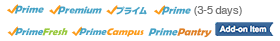

In [3]:
# Imprimir la información HTML mediante prettify, dandole formato.
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')
print(soup2)

In [4]:
# Obtención del título, dado que en este elemento se encuentra la descripción del artículo
title = soup2.find(id='title').get_text()
print(title)



                   Casio G-Shock reloj digital clásico para hombre, Classic, talla única , Negro
                  



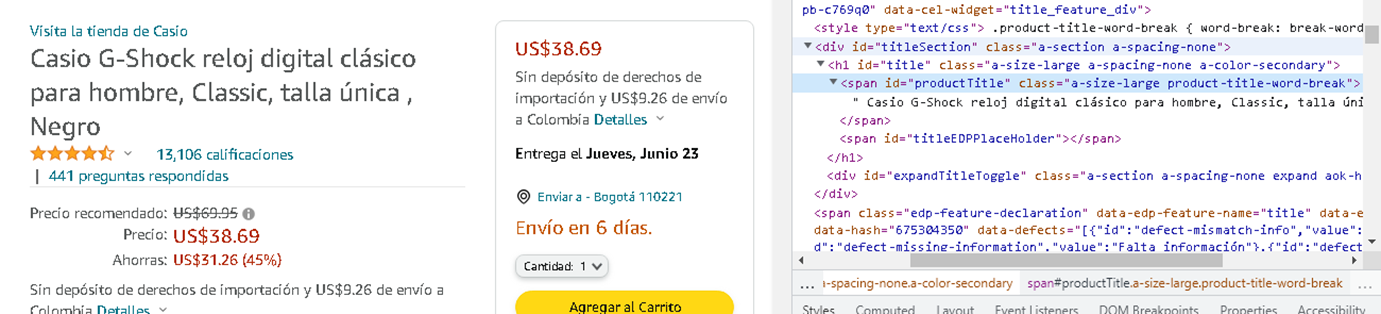

In [5]:
# Obtención del precio
precio = soup2.find(id='corePrice_feature_div')
print(precio)

<div class="celwidget" data-feature-name="corePrice" id="corePrice_feature_div">
<div class="a-section a-spacing-micro">
<span class="a-price aok-align-center" data-a-color="base" data-a-size="xl">
<span class="a-offscreen">
                            US$38.69
                           </span>
<span aria-hidden="true">
<span class="a-price-symbol">
                             US$
                            </span>
<span class="a-price-whole">
                             38
                             <span class="a-price-decimal">
                              .
                             </span>
</span>
<span class="a-price-fraction">
                             69
                            </span>
</span>
</span>
</div>
</div>


In [6]:
price=precio.find('span','a-offscreen').text

In [7]:
print(price)


                            US$38.69
                           


In [8]:
# Eliminar espacios innecesarios en el precio
price.strip()

'US$38.69'

In [9]:
# Eliminar la moneda y simbolo $ en el precio
price = price.strip()[3:]
print(price)

38.69


In [10]:
# Eliminar espacios innecesarios en el titulo del artículo
title=title.strip()
print(title)

Casio G-Shock reloj digital clásico para hombre, Classic, talla única , Negro


In [11]:
# Extraer la calificación del producto
calificacion=soup2.find(id='reviewsMedley')
print(calificacion)

<div class="a-fixed-left-grid a-spacing-extra-large" data-hook="reviews-medley-widget" id="reviewsMedley">
<div class="a-fixed-left-grid-inner" style="padding-left:300px">
<div class="a-fixed-left-grid-col a-col-left" style="width:300px;margin-left:-300px;float:left;">
<div class="a-row">
<h2>
             Opiniones de clientes
            </h2>
</div>
<div class="a-section a-spacing-none a-spacing-top-mini cr-widget-ACR">
<div class="a-fixed-left-grid AverageCustomerReviews a-spacing-small">
<div class="a-fixed-left-grid-inner" style="padding-left:105px">
<div class="a-fixed-left-grid-col a-col-left" style="width:105px;margin-left:-105px;float:left;">
<i class="a-icon a-icon-star-medium a-star-medium-4-5 averageStarRating" data-hook="average-star-rating">
<span class="a-icon-alt">
                 4.7 de 5 estrellas
                </span>
</i>
</div>
<div class="a-fixed-left-grid-col aok-align-center a-col-right" style="padding-left:0%;float:left;">
<div class="a-row">
<span class="a

In [12]:
cali=calificacion.find('span','a-size-medium a-color-base').text.strip()
print(cali)

4.7 de 5


In [13]:
# Extraer las descripciones del artículo
descripcion=soup2.find(id='feature-bullets').get_text().strip()
descripcion = descripcion.replace('\n',"")
descripcion = descripcion.replace('  ',"")
descripcion = descripcion.replace('Sobre este artículo ',"")
print(descripcion)

Importado Multifunción con alarma 1/100 segundo cronómetro Temporizador de cuenta atrás Medición de la unidad Día, fecha y mes


In [14]:
# Establecer al fecha del día de la recolección
today = datetime.date.today()
print(today)

2022-06-15


In [15]:
# Creación de un CSV para guardar los datos
import csv
header = ['Articulo','Precio','Fecha','Calificación','Descripción']
data = [title, price, today, cali, descripcion]

with open('AmazonScrappingData.csv', 'w', newline='', encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [16]:
# Leer y llevar el archivo creado a un dataframe
import pandas as pd
df = pd.read_csv('AmazonScrappingData.csv')

In [17]:
# Visualizar las primeras filas del df
df.head()

Articulo  Precio       Fecha  \
0  Casio G-Shock reloj digital clásico para hombr...   38.69  2022-06-15   

  Calificación                                        Descripción  
0     4.7 de 5  Importado Multifunción con alarma 1/100 segund...

In [18]:
# Obtener las opiniones destacadas del producto
opiniones = []
for i in soup2.find_all('span','cr-original-review-content'):
    ii=i.getText().replace('\n',"").replace('   ',"")
    opiniones.append(ii)

In [19]:
opiniones

[' One Watch To Rule Them All',
 "It's the watch your dad had in 1989. It is cool for this fact because you are now the same age as your dad in 1989. You never understood this basic watch in your younger years since you always wanted a Rolex or Omega. You always wanted a Lamborghini or Ferrari too but guess what? You are older and drive a paid off Camry and just like that Camry this little beauty is the most practical thing ever and can probably survive WWIII. It can get beat up, neglected, you can leave it on at the neighbor's pool party and it will always be there to tell you happily that lunch time is in 10 minutes.Yeah 10 minutes can you believe that the morning went so quick for a Tuesday? Also remember it is now March. Yeah February kinda flew by right? It is a certain confidence that lets the world know you aren't compensating for any lack of character. It's not even solar. Keep of the light button and the battery will last 11 years no problem but, you will probably drop it on a

In [20]:
# LLevar el arreglo con las opiniones a un DataFrame
df_opiniones = pd.DataFrame(data=opiniones)
df_opiniones.columns=['Opiniones']

In [21]:
# Visualización del DataFrame con las opiniones
df_opiniones

Opiniones
0                          One Watch To Rule Them All
1   It's the watch your dad had in 1989. It is coo...
2        Survived Army Basic Training and Afghanistan
3   When I joined the US Army we were given a chea...
4                             Awesome Classic G-Shock
5   This is actually my first Square G-Shock.  I'm...
6           I'll probably die before this watch does.
7   It's cheap, it's waterproof and it tells time....
8                                        G-SHOCKの原点  
9     普段はカシオの、F-91WやF-105Wを着けることが多いです。  どちらも1000円に...
10                                           8年経過後…  
11    8年間使ってます。 なんやかんやアウトドア、日常、仕事とずっと装着してます。 付いている...
12                              A watch for virgins  
13    This is a legendary watch - just as ugly and...

In [26]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd

In [27]:
# Definir la función para obtener la polaridad del texto
def obtener_polaridad (texto):
    return TextBlob(texto).sentiment.polarity

In [28]:
# Obtener la polaridad del texto en el DataFrame
df_opiniones['polaridad'] = df_opiniones['Opiniones'].apply(obtener_polaridad)

In [29]:
# Visualizar el DataFrame una vez calculada la polaridad
df_opiniones

Opiniones  polaridad
0                          One Watch To Rule Them All   0.000000
1   It's the watch your dad had in 1989. It is coo...   0.264844
2        Survived Army Basic Training and Afghanistan   0.000000
3   When I joined the US Army we were given a chea...   0.171667
4                             Awesome Classic G-Shock   0.583333
5   This is actually my first Square G-Shock.  I'm...   0.191742
6           I'll probably die before this watch does.   0.000000
7   It's cheap, it's waterproof and it tells time....  -0.032727
8                                        G-SHOCKの原点     0.000000
9     普段はカシオの、F-91WやF-105Wを着けることが多いです。  どちらも1000円に...   0.000000
10                                           8年経過後…     0.000000
11    8年間使ってます。 なんやかんやアウトドア、日常、仕事とずっと装着してます。 付いている...   0.000000
12                              A watch for virgins     0.000000
13    This is a legendary watch - just as ugly and...   0.242241

In [30]:
# Llevar el Dataframe con las opiniones y la polaridad a un archivo CSV
df_opiniones.to_csv('df_opiniones')

In [31]:
# Creación de la función para la asignación de la polaridad.
def x_range (x):
    if x > 0:
        return 'Positivo'
    elif x == 0:
        return 'Neutro'
    else:
        return 'Negativo'

In [32]:
# Aplicación de la función a los datos de polaridad
df_opiniones['Resultado_polaridad'] = df_opiniones['polaridad'].apply(x_range)

In [33]:
# Visualización del resultado de la polaridad de las opiniones
df_opiniones

Opiniones  polaridad  \
0                          One Watch To Rule Them All   0.000000   
1   It's the watch your dad had in 1989. It is coo...   0.264844   
2        Survived Army Basic Training and Afghanistan   0.000000   
3   When I joined the US Army we were given a chea...   0.171667   
4                             Awesome Classic G-Shock   0.583333   
5   This is actually my first Square G-Shock.  I'm...   0.191742   
6           I'll probably die before this watch does.   0.000000   
7   It's cheap, it's waterproof and it tells time....  -0.032727   
8                                        G-SHOCKの原点     0.000000   
9     普段はカシオの、F-91WやF-105Wを着けることが多いです。  どちらも1000円に...   0.000000   
10                                           8年経過後…     0.000000   
11    8年間使ってます。 なんやかんやアウトドア、日常、仕事とずっと装着してます。 付いている...   0.000000   
12                              A watch for virgins     0.000000   
13    This is a legendary watch - just as ugly and...   0.242241   

   Resultado_polaridad  
0               Neutro  
1             Positivo  
2               Neutro  
3             Positivo  
4             Positivo  
5             Positivo  
6               Neutro  
7             Negativo  
8               Neutro  
9               Neutro  
10              Neutro  
11              Neutro  
12              Neutro  
13            Positivo

<AxesSubplot:ylabel='Resultado_polaridad'>

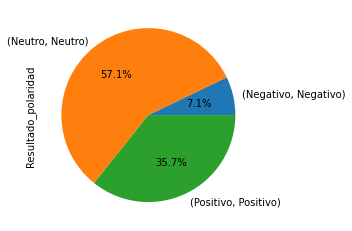

In [34]:
# Gráfico de pie chart con los datos de la polaridad del texto
data = df_opiniones.groupby("Resultado_polaridad")["Resultado_polaridad"].value_counts()
data.plot.pie(autopct="%.1f%%")

In [35]:
# Creación de nube de términos
# Transformación de todo el texto de las opiniones en uno solo
todo_texto = ''.join(df_opiniones['Opiniones'])
todo_texto

" One Watch To Rule Them AllIt's the watch your dad had in 1989. It is cool for this fact because you are now the same age as your dad in 1989. You never understood this basic watch in your younger years since you always wanted a Rolex or Omega. You always wanted a Lamborghini or Ferrari too but guess what? You are older and drive a paid off Camry and just like that Camry this little beauty is the most practical thing ever and can probably survive WWIII. It can get beat up, neglected, you can leave it on at the neighbor's pool party and it will always be there to tell you happily that lunch time is in 10 minutes.Yeah 10 minutes can you believe that the morning went so quick for a Tuesday? Also remember it is now March. Yeah February kinda flew by right? It is a certain confidence that lets the world know you aren't compensating for any lack of character. It's not even solar. Keep of the light button and the battery will last 11 years no problem but, you will probably drop it on a cruse

In [36]:
# Importar librerias requeridas para la eliminación de stopwords y la tokenización del texto
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('punkt')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\usuario.DESKTOP-
[nltk_data]     3A59NKC.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\usuario.DESKTOP-3A59
[nltk_data]     NKC.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Generación de arreglos con las stopwords y la tokenización del texto
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(todo_texto)

# Generación del texto filtrando las stopwords
todo_texto_filtrado = [w for w in word_tokens if not w.lower() in stop_words]
todo_texto_filtrado = []
  
for w in word_tokens:
    if w not in stop_words:
        todo_texto_filtrado.append(w)
# Visualización del texto tokenizado 
print(word_tokens)
# Visualización del texto sin stopwords
print(todo_texto_filtrado)

['One', 'Watch', 'To', 'Rule', 'Them', 'AllIt', "'s", 'the', 'watch', 'your', 'dad', 'had', 'in', '1989', '.', 'It', 'is', 'cool', 'for', 'this', 'fact', 'because', 'you', 'are', 'now', 'the', 'same', 'age', 'as', 'your', 'dad', 'in', '1989', '.', 'You', 'never', 'understood', 'this', 'basic', 'watch', 'in', 'your', 'younger', 'years', 'since', 'you', 'always', 'wanted', 'a', 'Rolex', 'or', 'Omega', '.', 'You', 'always', 'wanted', 'a', 'Lamborghini', 'or', 'Ferrari', 'too', 'but', 'guess', 'what', '?', 'You', 'are', 'older', 'and', 'drive', 'a', 'paid', 'off', 'Camry', 'and', 'just', 'like', 'that', 'Camry', 'this', 'little', 'beauty', 'is', 'the', 'most', 'practical', 'thing', 'ever', 'and', 'can', 'probably', 'survive', 'WWIII', '.', 'It', 'can', 'get', 'beat', 'up', ',', 'neglected', ',', 'you', 'can', 'leave', 'it', 'on', 'at', 'the', 'neighbor', "'s", 'pool', 'party', 'and', 'it', 'will', 'always', 'be', 'there', 'to', 'tell', 'you', 'happily', 'that', 'lunch', 'time', 'is', 'in',

In [38]:
# Devolver el arreglo del texto tokenizado a un solo texto
todo_texto2 = ' '.join(todo_texto_filtrado)

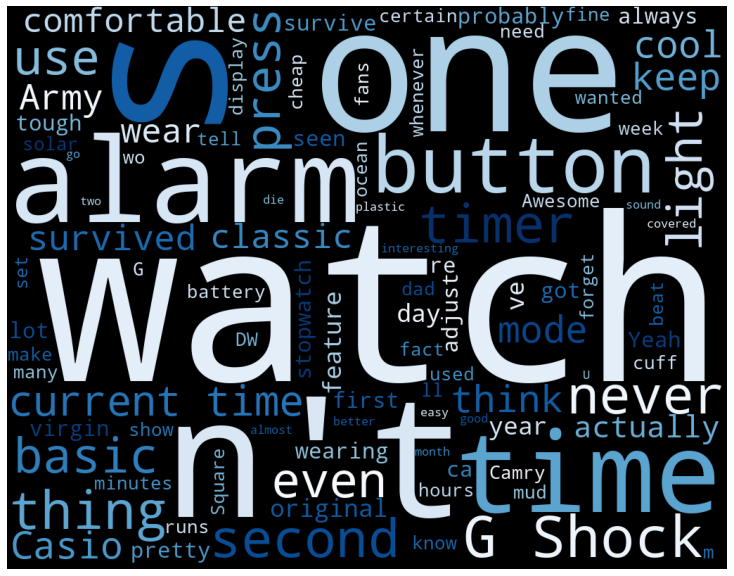

In [39]:
# Generación del gráfico de nube de términos con el texto de las opiniones
nube_palabras = WordCloud(width = 1024, height = 800, colormap = 'Blues', min_font_size = 14).generate(todo_texto2)
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(nube_palabras)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Amazon web scraping de una búsqueda global de artículos

## Objetivo 
Extraer la información de cada uno de los elementos de la página de búsqueda global de artículos de Amazon, como: nombres de los artículos, precio y puntuación. Generando una base de datos con la información.


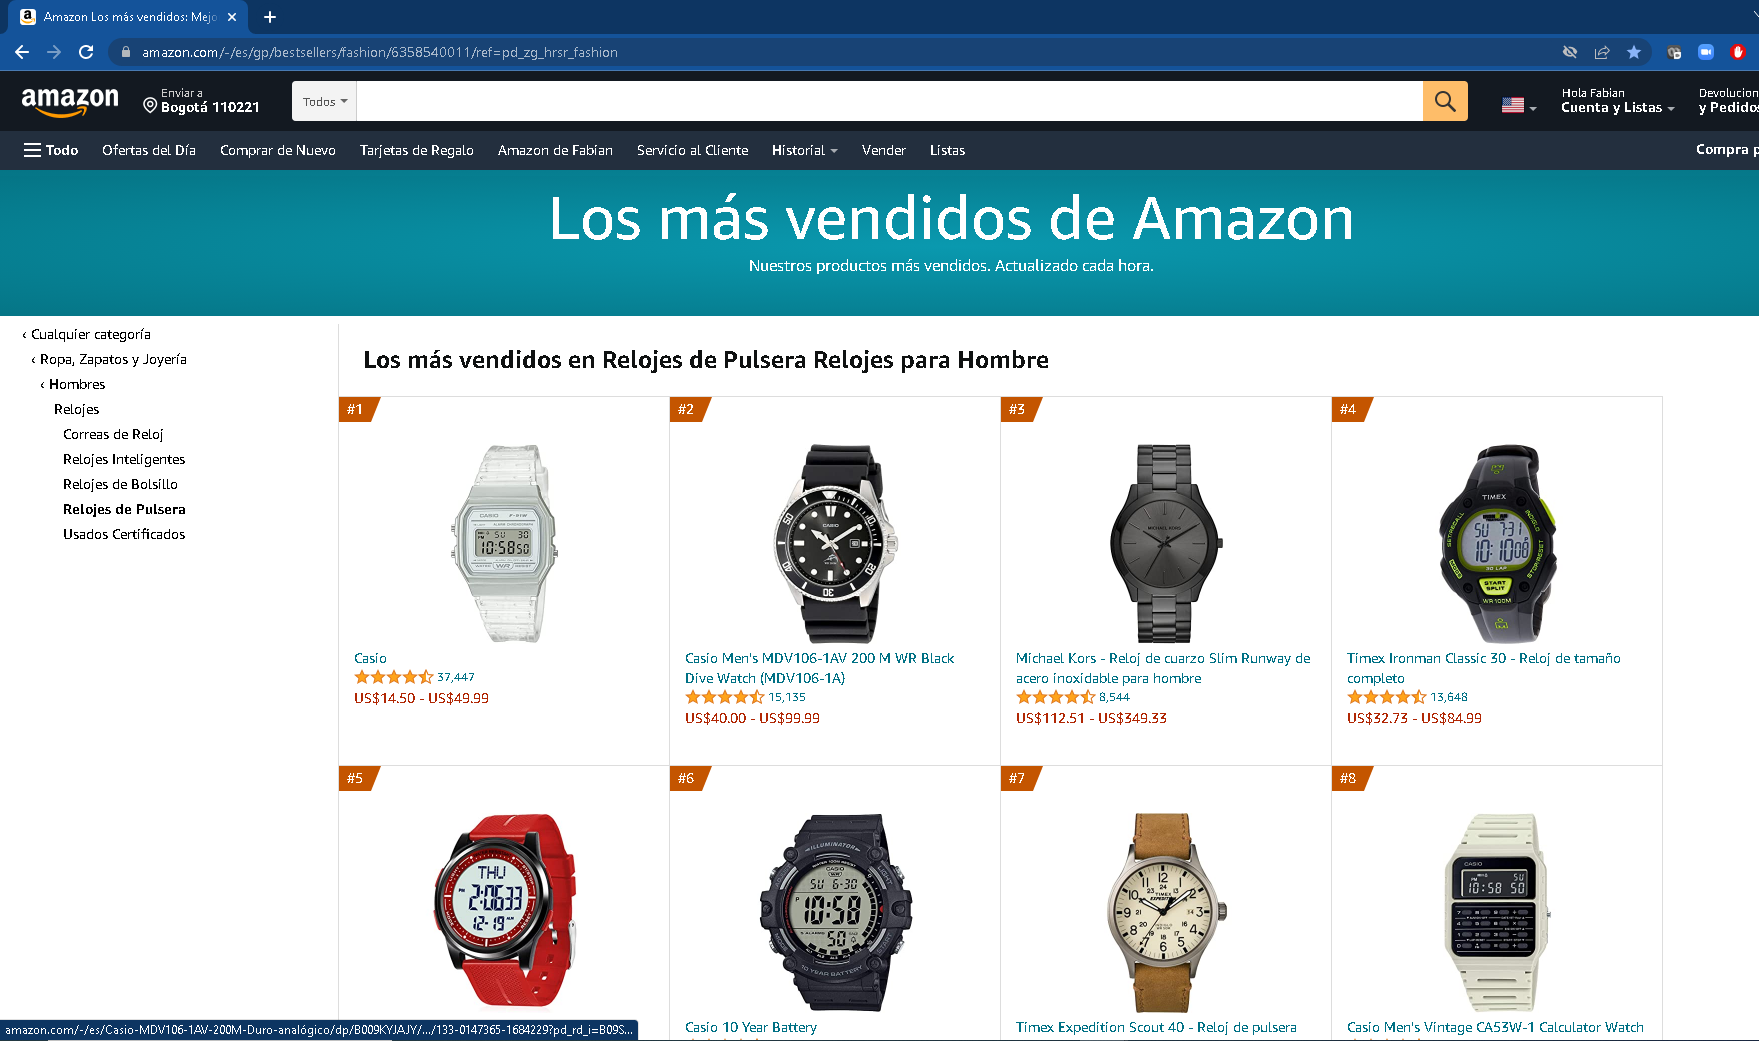

In [40]:
# Conectar al sitio Web desde el que se va a extaer los datos
URL='https://www.amazon.com/-/es/Best-Sellers-Ropa-Zapatos-y-Joyera-Relojes-de-Pulsera-Relojes-para-Hombre/zgbs/fashion/6358540011/ref=zg_bs_pg_1?_encoding=UTF8&pg=1'
# Se requiere indicar los agentes, estos se obtienen en este link: https://httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36","Accept-Encoding": "gzip, deflate", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests":"1"}
page = requests.get(URL, headers=headers)
soup3 = BeautifulSoup(page.content, 'html.parser')
print (soup3)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.

In [41]:
# Generar arreglos vacios para almacenar los datos a extraer
articulo = []
precio = []
puntuacion = []

In [42]:
soup3 = BeautifulSoup(soup3.prettify(), 'html.parser')
print(soup3)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli

In [43]:
# Obtención del artículo
articulo = []
for a in soup3.find_all(['span','div'], '_cDEzb_p13n-sc-css-line-clamp-3_g3dy1'):
  art = a.getText().replace('\n',"").replace('   ',"")
  articulo.append(art)

In [44]:
articulo

[' Casio',
 ' Michael Kors - Reloj de cuarzo Slim Runway de acero inoxidable para hombre',
 " Casio Men's MDV106-1AV 200 M WR Black Dive Watch (MDV106-1A)",
 ' Beeasy - Reloj digital de pulsera resistente al agua con cronómetro, alarma, cuenta regresiva, doble zona horaria, ultrafino, pantalla angular muy amplia, para hombres y mujeres.',
 ' Timex Ironman Classic 30 - Reloj de tamaño completo',
 ' Timex Expedition Scout 40 - Reloj de pulsera para hombre',
 ' Casio Reloj unisex F-108WH-1ACF con pantalla digital cuadrada grande, cuarzo negro',
 ' Casio 10 Year Battery',
 ' Timex Reloj unisex Weekender de 1.496\xa0in',
 ' Timex Easy Reader Reloj con correa de cuero de 1.496\xa0pulgadas',
 ' Casio - Reloj deportivo',
 ' Timex reloj pulsera para hombres, con día y fecha y lectura sencilla',
 ' Fossil - Reloj casual de cuarzo, minimalista, de acero inoxidable y delgado para hombre',
 ' BOBO BIRD Relojes de madera grabados personalizados para hombre, elegantes relojes de pulsera de cuarzo com

In [45]:
# Obtención del precio
precio = []
for b in soup3.find_all(['span','div'], 'a-size-base a-color-price'):
  pre = b.getText().replace('\n',"").replace(' ',"")
  precio.append(pre)

In [46]:
precio

['US$14.50-US$49.99',
 'US$112.51-US$349.33',
 'US$40.00-US$99.99',
 'US$16.99-US$17.99',
 'US$32.73-US$84.99',
 'US$34.85-US$109.95',
 'US$14.88-US$45.00',
 'US$19.92-US$37.87',
 'US$29.16-US$90.00',
 'US$31.02-US$103.76',
 'US$46.50-US$94.99',
 'US$31.99-US$89.99',
 'US$69.55-US$190.00',
 'US$39.94-US$59.99',
 'US$16.99',
 'US$42.99-US$69.99',
 'US$38.69',
 'US$15.99',
 'US$16.99-US$26.99',
 'US$84.75-US$231.09',
 'US$32.88-US$94.03',
 'US$76.82-US$203.74',
 'US$91.01-US$182.90',
 'US$45.99-US$51.99',
 'US$45.99-US$52.99',
 'US$27.90',
 'US$74.99-US$197.29',
 'US$13.33',
 'US$82.99-US$216.74',
 'US$93.03-US$109.99']

In [47]:
# Obtención de la puntuación
puntuacion = []
for c in soup3.find_all(['span','div'], 'a-icon-alt'):
  pun = c.getText().replace('\n',"").replace(' de 5 estrellas',"").replace(' ',"")
  puntuacion.append(pun)

In [48]:
puntuacion

['4.6',
 '4.7',
 '4.7',
 '4.1',
 '4.6',
 '4.4',
 '4.7',
 '4.7',
 '4.6',
 '4.6',
 '4.7',
 '4.5',
 '4.5',
 '4.8',
 '4.4',
 '4.4',
 '4.7',
 '4.2',
 '4.3',
 '4.6',
 '4.5',
 '4.6',
 '4.7',
 '4.3',
 '4.5',
 '4.7',
 '4.7',
 '4.4',
 '4.7',
 '4.7']

In [49]:
datos={"Artículo" : articulo, "Precio" : precio, "Puntuación" : puntuacion}
amazon=pd.DataFrame(data=datos)

In [50]:
amazon

Artículo               Precio  \
0                                               Casio    US$14.50-US$49.99   
1    Michael Kors - Reloj de cuarzo Slim Runway de...  US$112.51-US$349.33   
2    Casio Men's MDV106-1AV 200 M WR Black Dive Wa...    US$40.00-US$99.99   
3    Beeasy - Reloj digital de pulsera resistente ...    US$16.99-US$17.99   
4    Timex Ironman Classic 30 - Reloj de tamaño co...    US$32.73-US$84.99   
5    Timex Expedition Scout 40 - Reloj de pulsera ...   US$34.85-US$109.95   
6    Casio Reloj unisex F-108WH-1ACF con pantalla ...    US$14.88-US$45.00   
7                               Casio 10 Year Battery    US$19.92-US$37.87   
8            Timex Reloj unisex Weekender de 1.496 in    US$29.16-US$90.00   
9    Timex Easy Reader Reloj con correa de cuero d...   US$31.02-US$103.76   
10                            Casio - Reloj deportivo    US$46.50-US$94.99   
11   Timex reloj pulsera para hombres, con día y f...    US$31.99-US$89.99   
12   Fossil - Reloj casual de cuarzo, minimalista,...   US$69.55-US$190.00   
13   BOBO BIRD Relojes de madera grabados personal...    US$39.94-US$59.99   
14   Mens Digital Sports Watch LED Screen Large Fa...             US$16.99   
15   Relojes para hombre, cronógrafo, acero inoxid...    US$42.99-US$69.99   
16   Casio G-Shock reloj digital clásico para homb...             US$38.69   
17   Reloj digital deportivo para hombre, esfera g...             US$15.99   
18   YUINK Mens Watch Ultra-Thin Digital Sports Wa...    US$16.99-US$26.99   
19   Fossil Neutra - Reloj cronógrafo de cuarzo de...   US$84.75-US$231.09   
20   Timex Expedition Acadia Reloj de pulsera para...    US$32.88-US$94.03   
21   Fossil Nate - Reloj casual de cuarzo para hom...   US$76.82-US$203.74   
22   Fossil Townsman - Reloj cronógrafo de cuarzo,...   US$91.01-US$182.90   
23   CRRJU - Reloj de pulsera, de acero inoxidable...    US$45.99-US$51.99   
24   Golden Hour Fashion Business Relojes para hom...    US$45.99-US$52.99   
25   Invicta 12847 reloj de acero inoxidable espec...             US$27.90   
26   Fossil Grant - Reloj cronógrafo de cuarzo de ...   US$74.99-US$197.29   
27   Casio Reloj analógico MQ24-7B2 para hombre co...             US$13.33   
28   Fossil Machine - Reloj cronógrafo de cuarzo d...   US$82.99-US$216.74   
29       Casio Men's XL Series G-Shock Quartz 200M WR   US$93.03-US$109.99   

   Puntuación  
0         4.6  
1         4.7  
2         4.7  
3         4.1  
4         4.6  
5         4.4  
6         4.7  
7         4.7  
8         4.6  
9         4.6  
10        4.7  
11        4.5  
12        4.5  
13        4.8  
14        4.4  
15        4.4  
16        4.7  
17        4.2  
18        4.3  
19        4.6  
20        4.5  
21        4.6  
22        4.7  
23        4.3  
24        4.5  
25        4.7  
26        4.7  
27        4.4  
28        4.7  
29        4.7

In [51]:
amazon.to_csv('amazon.csv')